<a href="https://colab.research.google.com/github/BMac23/Mat421/blob/main/Section_22_4%2C_22_5%2C_and_22_6_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Error and Instability

A large problem for integrating ODEs comes from numerical error. We try to evaluate these integration models by its accuracy or how far it deviates from the exact solution. Error can often come about through the use of different methods depending on each ODE. Most models have some error but the stability can vary. Stability determines how effective each model is at getting back close to the exact solution after some amount of error.

Let's look at the simple ODE:
\begin{equation}
\frac{dy}{dt} = -ay
\end{equation}
and showcase different methods used to integrate this function to the exact solution:
\begin{equation}
y(t) = y_o e^{-at}
\end{equation}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

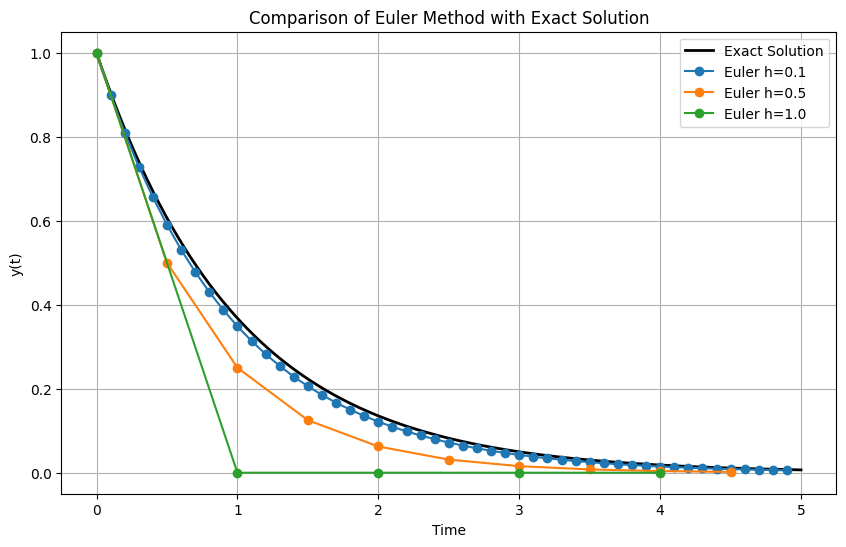

In [ ]:
a = 1.0
y0 = 1.0
t_end = 5.0
step_sizes = [0.1, 0.5, 1.0]

def exact_solution(t):
    return y0 * np.exp(-a * t)

def euler_method(step_size):
    t_values = np.arange(0, t_end, step_size)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1] - step_size * a * y_values[i-1]
    return t_values, y_values

plt.figure(figsize=(10, 6))

t_exact = np.linspace(0, t_end, 1000)
plt.plot(t_exact, exact_solution(t_exact), label='Exact Solution', color='black', linewidth=2)

for step_size in step_sizes:
    t_numerical, y_numerical = euler_method(step_size)
    plt.plot(t_numerical, y_numerical, label=f'Euler h={step_size}', marker='o')

plt.title('Comparison of Euler Method with Exact Solution')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()

# Runge-Kutta Method

Different "Predictor-Corrector" methods are used to help improve the accuracy of solving an initial value problem. These are done by taking the inital function and looking at several points to make a weighted average and update the state of the model being used.

Runge Kutta methods are among the most common of these methods where it looks at different orders of the Taylor Series approximation.

Let's look at the Van der Pol oscillator which is a very common equation when teaching ODEs. The standard equation is given as:
\begin{equation}
\frac{d^2y}{dt^2} - \mu (1-x^2) \frac{dy}{dt} + x = 0
\end{equation}

We will solve this by using the Runga Kutta 4th Order Method by first turning it into two first order equations where $y=\frac{dy}{dt}$ where we get:
\begin{equation}
\frac{dx}{dt} = y
\end{equation}
and
\begin{equation}
\frac{dy}{dt} = \mu (1-x^2)y-x
\end{equation}

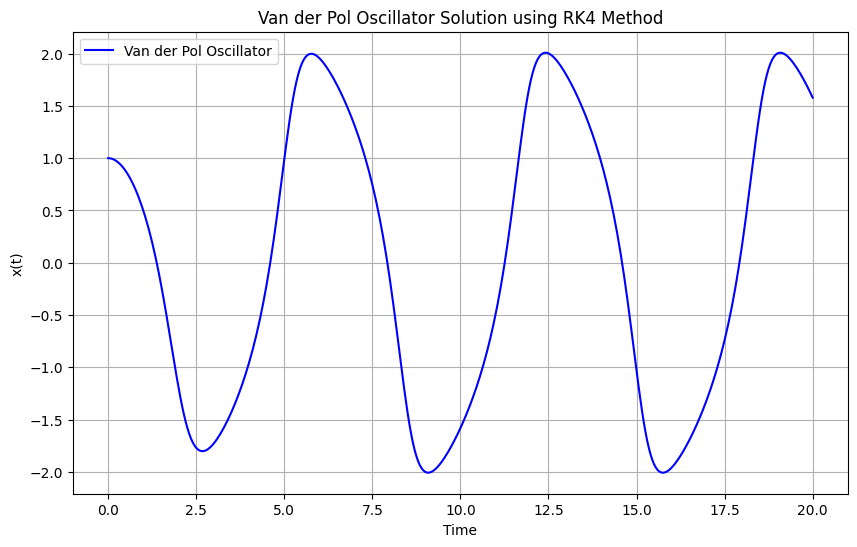

In [ ]:
mu = 1.0

def runge_kutta_4_vdp(step_size, t_end):
    def f(x, y):
        dxdt = y
        dydt = mu * (1 - x**2) * y - x
        return dxdt, dydt

    t_values = np.arange(0, t_end + step_size, step_size)
    x_values = np.zeros(len(t_values))
    y_values = np.zeros(len(t_values))

    x_values[0] = 1.0
    y_values[0] = 0.0

    for i in range(len(t_values) - 1):
        k1_x, k1_y = f(x_values[i], y_values[i])
        k2_x, k2_y = f(x_values[i] + 0.5 * step_size * k1_x, y_values[i] + 0.5 * step_size * k1_y)
        k3_x, k3_y = f(x_values[i] + 0.5 * step_size * k2_x, y_values[i] + 0.5 * step_size * k2_y)
        k4_x, k4_y = f(x_values[i] + step_size * k3_x, y_values[i] + step_size * k3_y)

        x_values[i+1] = x_values[i] + (step_size / 6.0) * (k1_x + 2*k2_x + 2*k3_x + k4_x)
        y_values[i+1] = y_values[i] + (step_size / 6.0) * (k1_y + 2*k2_y + 2*k3_y + k4_y)

    return t_values, x_values

t_end_vdp = 20.0
step_size_vdp = 0.05
t_vdp, x_vdp = runge_kutta_4_vdp(step_size_vdp, t_end_vdp)

plt.figure(figsize=(10, 6))

plt.plot(t_vdp, x_vdp, label='Van der Pol Oscillator', color='blue')

plt.title('Van der Pol Oscillator Solution using RK4 Method')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()